# Kruskal-Wallis test

#### one way anova

In [2]:
library(readxl)
library(rstatix)
library(ggpubr)
library(lawstat)

In [3]:
N_back_3groups = read_excel("D://Amar//Codes_Data//N_back_3groups.xlsx")

In [4]:
N_back_3groups

id,group,MRT
<dbl>,<chr>,<dbl>
1,One_Back,0.317
2,One_Back,0.158
3,One_Back,0.518
4,One_Back,0.611
5,One_Back,0.150
6,One_Back,0.161
7,One_Back,0.517
8,One_Back,0.553
9,One_Back,0.533


In [5]:
N_back_3groups %>% group_by(group) %>% get_summary_stats(MRT, type = "median_iqr")

group,variable,n,median,iqr
<chr>,<fct>,<dbl>,<dbl>,<dbl>
One_Back,MRT,30,0.417,0.375
Three_back,MRT,30,4.426,0.371
Two_back,MRT,30,1.421,0.373


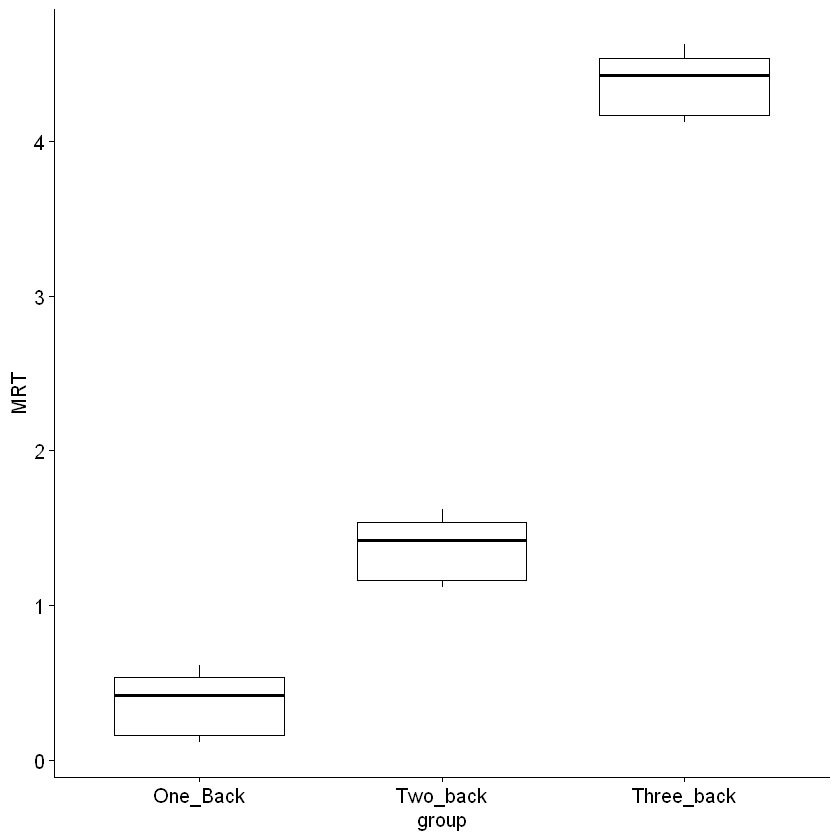

In [6]:
ggboxplot(N_back_3groups, x = "group", y = "MRT" )

In [7]:
N_back_3groups %>% group_by(group) %>% identify_outliers(MRT)

group,id,MRT,is.outlier,is.extreme
<chr>,<dbl>,<dbl>,<lgl>,<lgl>


In [8]:
N_back_3groups %>% group_by(group) %>% shapiro_test(MRT)

group,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
One_Back,MRT,0.8010355,6.847518e-05
Three_back,MRT,0.8080260,9.213559e-05
Two_back,MRT,0.8049325,8.074167e-05


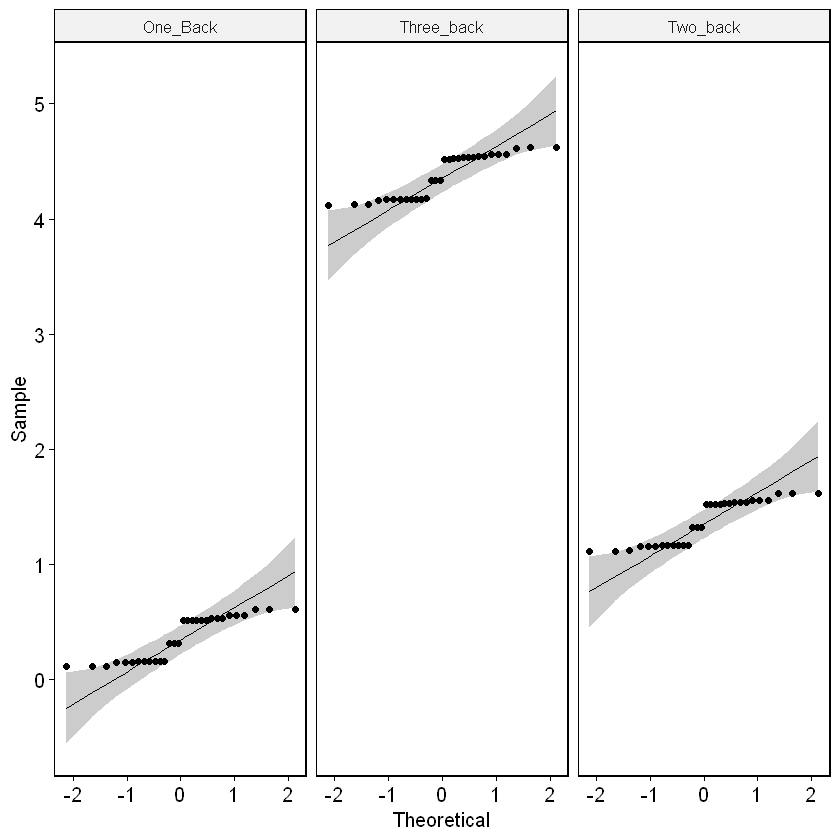

In [9]:
ggqqplot(N_back_3groups, "MRT", facet.by = "group")

In [10]:
N_back_3groups %>% kruskal_test(MRT ~ group)

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>
1,MRT,90,79.14694,2,6.51e-18,Kruskal-Wallis


In [11]:
N_back_3groups %>% kruskal_effsize(MRT~group)

,.y.,n,effsize,method,magnitude
,<chr>,<int>,<dbl>,<chr>,<ord>
1,MRT,90,0.8867464,eta2[H],large


## Non Para Post-hoc

In [22]:
N_back_3groups %>% wilcox_test(MRT~group, p.adjust.method = "bonferroni")

,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,MRT,One_Back,Three_back,30,30,0,2.94e-11,8.82e-11,****
2,MRT,One_Back,Two_back,30,30,0,2.94e-11,8.82e-11,****
3,MRT,Three_back,Two_back,30,30,900,1.69e-17,5.07e-17,****


In [32]:
coxres = N_back_3groups %>% wilcox_test(MRT~group, p.adjust.method = "bonferroni")

In [33]:
ggres = ggboxplot(N_back_3groups, x = "group", y = "MRT" )

In [39]:
coxres = coxres %>% add_xy_position(x = "group")

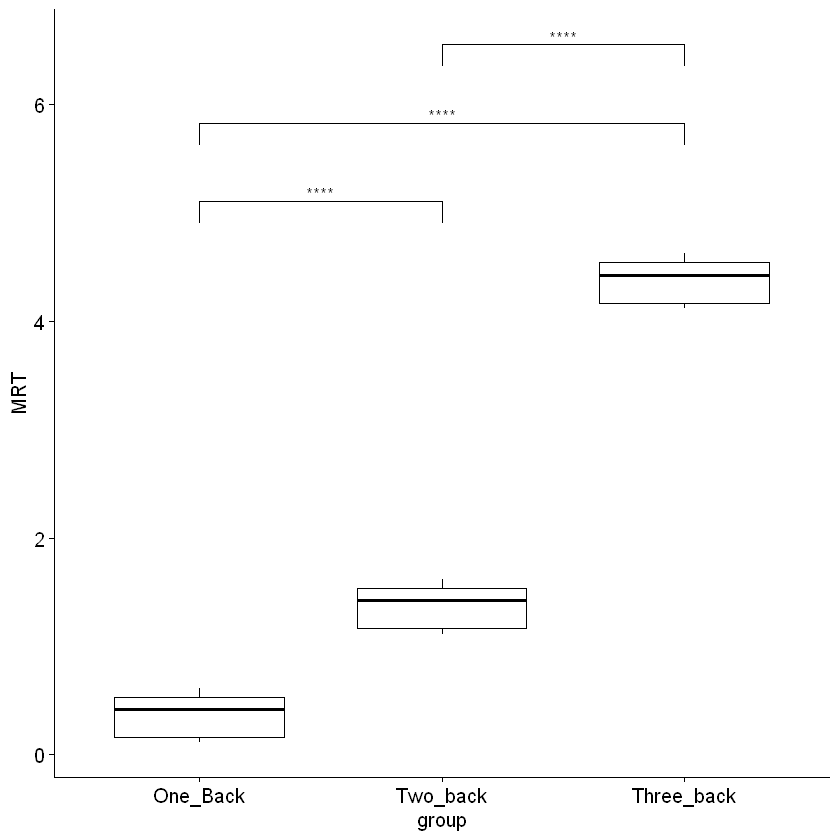

In [40]:
ggres + stat_pvalue_manual(coxres)

# Friedman

#### One way repeated measure anova


In [42]:
N_back_3Condition  = read_excel("D://Amar//Codes_Data//N_back_3Conditions.xlsx")

In [43]:
N_back_3Condition

id,condition,MRT
<dbl>,<chr>,<dbl>
1,One_Back,0.317
2,One_Back,0.158
3,One_Back,0.518
4,One_Back,0.611
5,One_Back,0.150
6,One_Back,0.161
7,One_Back,0.517
8,One_Back,0.553
9,One_Back,0.533


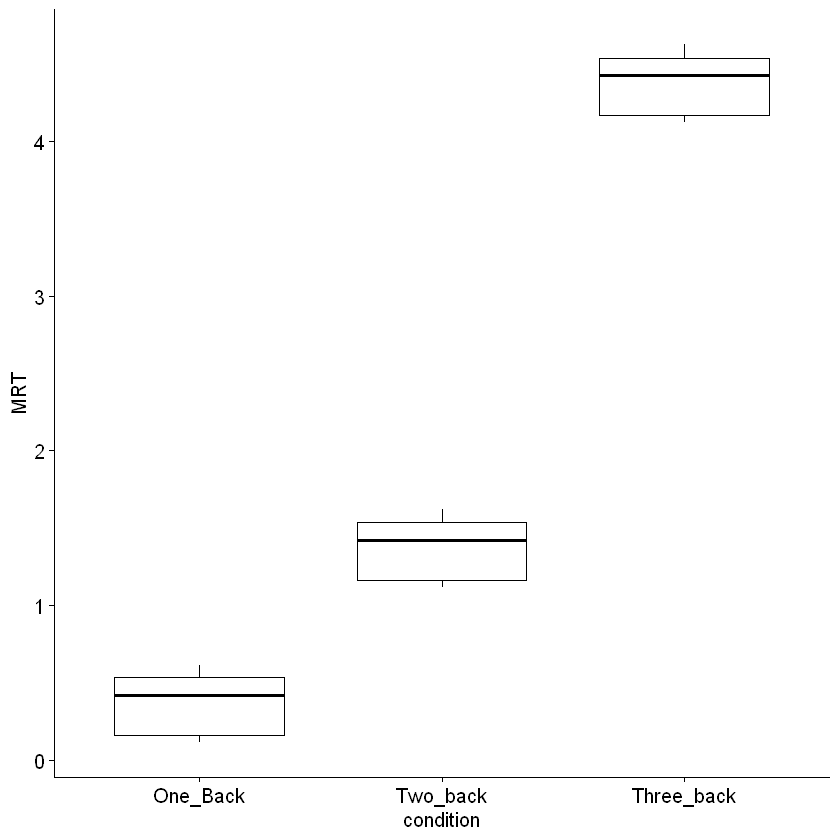

In [44]:
ggboxplot(N_back_3Condition, x = "condition", y = "MRT")

In [45]:
N_back_3Condition %>% group_by(condition) %>% shapiro_test(MRT)

condition,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
One_Back,MRT,0.8010355,6.847518e-05
Three_back,MRT,0.8080260,9.213559e-05
Two_back,MRT,0.8049325,8.074167e-05


In [48]:
N_back_3Condition %>% friedman_test(MRT ~ condition|id)

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,MRT,30,60,2,9.357623e-14,Friedman test


In [49]:
N_back_3Condition %>% wilcox_test(MRT~condition, paired = TRUE, p.adjust.method = "bonferroni")

,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,MRT,One_Back,Three_back,30,30,0,1.86e-09,5.58e-09,****
2,MRT,One_Back,Two_back,30,30,0,1.86e-09,5.58e-09,****
3,MRT,Three_back,Two_back,30,30,465,1.86e-09,5.58e-09,****


In [50]:
coxres2 = N_back_3Condition %>% wilcox_test(MRT~condition, paired = TRUE, p.adjust.method = "bonferroni")

In [51]:
coxres2 = coxres2 %>% add_xy_position(x = "condition")

In [52]:
ggres2 = ggboxplot(N_back_3Condition, x = "condition", y = "MRT")

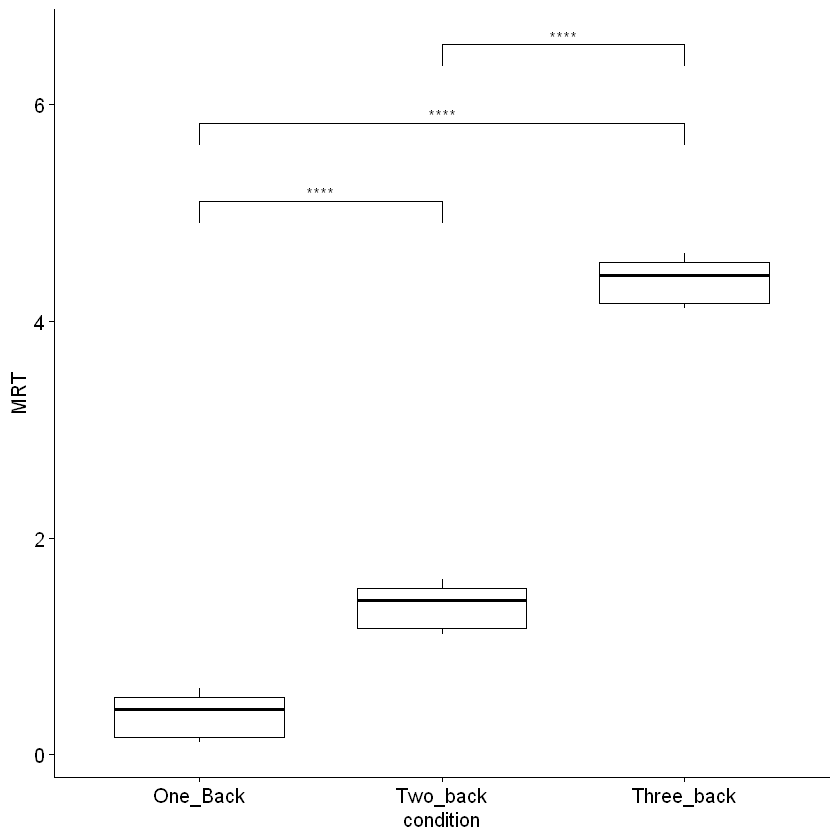

In [54]:
ggboxplot(N_back_3Condition, x = "condition", y = "MRT") + stat_pvalue_manual(coxres2)